# 1.데이터입력

In [6]:
import pandas as pd 

data = pd.read_csv('./yemoonsaBigdata/datasets/Part2/housing_data.csv', header = None, sep =',')
col_names = ['CRIM', 'ZN', 'INDUS','CHAS','NOS','RM', 'AGE', 'DIS', 'RAD', 'TTAX', 'PIRATIO','B','LSTAT','MEDV','isHighValue']

data.columns = col_names

In [8]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOS,RM,AGE,DIS,RAD,TTAX,PIRATIO,B,LSTAT,MEDV,isHighValue
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,1


# 2.데이터 전처리

## (1) 데이터확인

In [9]:
data.shape

(526, 15)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         506 non-null    float64
 1   ZN           526 non-null    float64
 2   INDUS        526 non-null    float64
 3   CHAS         526 non-null    int64  
 4   NOS          526 non-null    float64
 5   RM           526 non-null    float64
 6   AGE          526 non-null    float64
 7   DIS          526 non-null    float64
 8   RAD          526 non-null    int64  
 9   TTAX         526 non-null    float64
 10  PIRATIO      526 non-null    float64
 11  B            526 non-null    float64
 12  LSTAT        526 non-null    float64
 13  MEDV         526 non-null    float64
 14  isHighValue  526 non-null    int64  
dtypes: float64(12), int64(3)
memory usage: 61.8 KB


In [12]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOS,RM,AGE,DIS,RAD,TTAX,PIRATIO,B,LSTAT,MEDV,isHighValue
count,506.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,3.613524,10.931559,11.306616,0.066540,0.555954,6.271076,68.816540,3.742880,9.416350,410.547529,18.513308,357.888099,12.721578,22.374525,0.250951
std,8.601545,22.977112,6.934739,0.249461,0.113854,0.698140,27.868375,2.083661,8.653743,169.180818,2.147684,89.829808,7.101213,9.104400,0.433973
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.453000,5.879250,45.625000,2.101425,4.000000,279.000000,17.400000,376.057500,7.150000,16.850000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.183500,77.500000,3.095750,5.000000,334.500000,19.100000,391.955000,11.490000,21.100000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.613500,93.900000,5.112625,24.000000,666.000000,20.200000,396.397500,17.057500,24.950000,0.750000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000


## (2) 결측치 확인

In [13]:
#결측 갯수 확인
data.isnull().sum()

CRIM           20
ZN              0
INDUS           0
CHAS            0
NOS             0
RM              0
AGE             0
DIS             0
RAD             0
TTAX            0
PIRATIO         0
B               0
LSTAT           0
MEDV            0
isHighValue     0
dtype: int64

In [16]:
#결측비율 확인
data.isnull().sum()/data.shape[0]

CRIM           0.038023
ZN             0.000000
INDUS          0.000000
CHAS           0.000000
NOS            0.000000
RM             0.000000
AGE            0.000000
DIS            0.000000
RAD            0.000000
TTAX           0.000000
PIRATIO        0.000000
B              0.000000
LSTAT          0.000000
MEDV           0.000000
isHighValue    0.000000
dtype: float64

In [24]:
#결측치 중간값으로 대체
data1 = data.copy()
med_val = data['CRIM'].median()
data1['CRIM'] = data1['CRIM'].fillna(med_val)
data1.shape[0]

526

In [29]:
#결측치 제거
data = data.loc[data['CRIM'].notnull(),]

## (3) 이상치 확인


<Axes: >

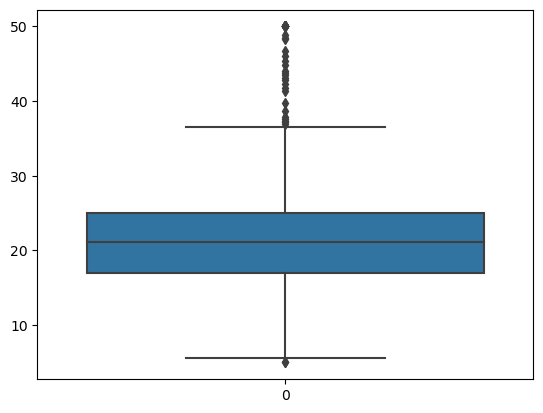

In [32]:
#박스 플롯
import seaborn as sns

sns.boxplot(data['MEDV'])

In [52]:
#IQR 구하기
Q1, Q3 = data['MEDV'].quantile([0.25,0.75])
IQR = Q3 - Q1
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

print(upper_bound, lower_bound)
print('이상치 갯수 : ' , len((data[(data['MEDV']>upper_bound)|(data['MEDV']<lower_bound)]))) 
print('이상치 비율 : ' , len((data[(data['MEDV']>upper_bound)|(data['MEDV']<lower_bound)]))/len(data)) 

36.962500000000006 5.0624999999999964
이상치 갯수 :  40
이상치 비율 :  0.07905138339920949


In [57]:
#함수 만들기
def get_outlier_prop(x):
    Q1, Q3 = x.quantile([0.25,0.75])
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR
    outliers = x[(x>upper_bound)|(x<lower_bound)]

    return str(round(100*len(outliers)/len(x),1))

In [58]:
data.apply(get_outlier_prop)

CRIM           13.0
ZN             13.4
INDUS           0.0
CHAS            6.9
NOS             0.0
RM              5.9
AGE             0.0
DIS             1.0
RAD             0.0
TTAX            0.0
PIRATIO         3.0
B              15.2
LSTAT           1.4
MEDV            7.9
isHighValue     0.0
dtype: object

## (4) 변수변환

In [67]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOS', 'RM', 'AGE', 'DIS', 'RAD', 'TTAX',
       'PIRATIO', 'B', 'LSTAT', 'MEDV', 'isHighValue'],
      dtype='object')

/var/folders/cb/0cgtts7x7ps8zly4sl8xwntc0000gn/T/ipykernel_8883/2040127511.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[cols[idx]], ax=axs[_row][_col])
/var/folders/cb/0cgtts7x7ps8zly4sl8xwntc0000gn/T/ipykernel_8883/2040127511.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat

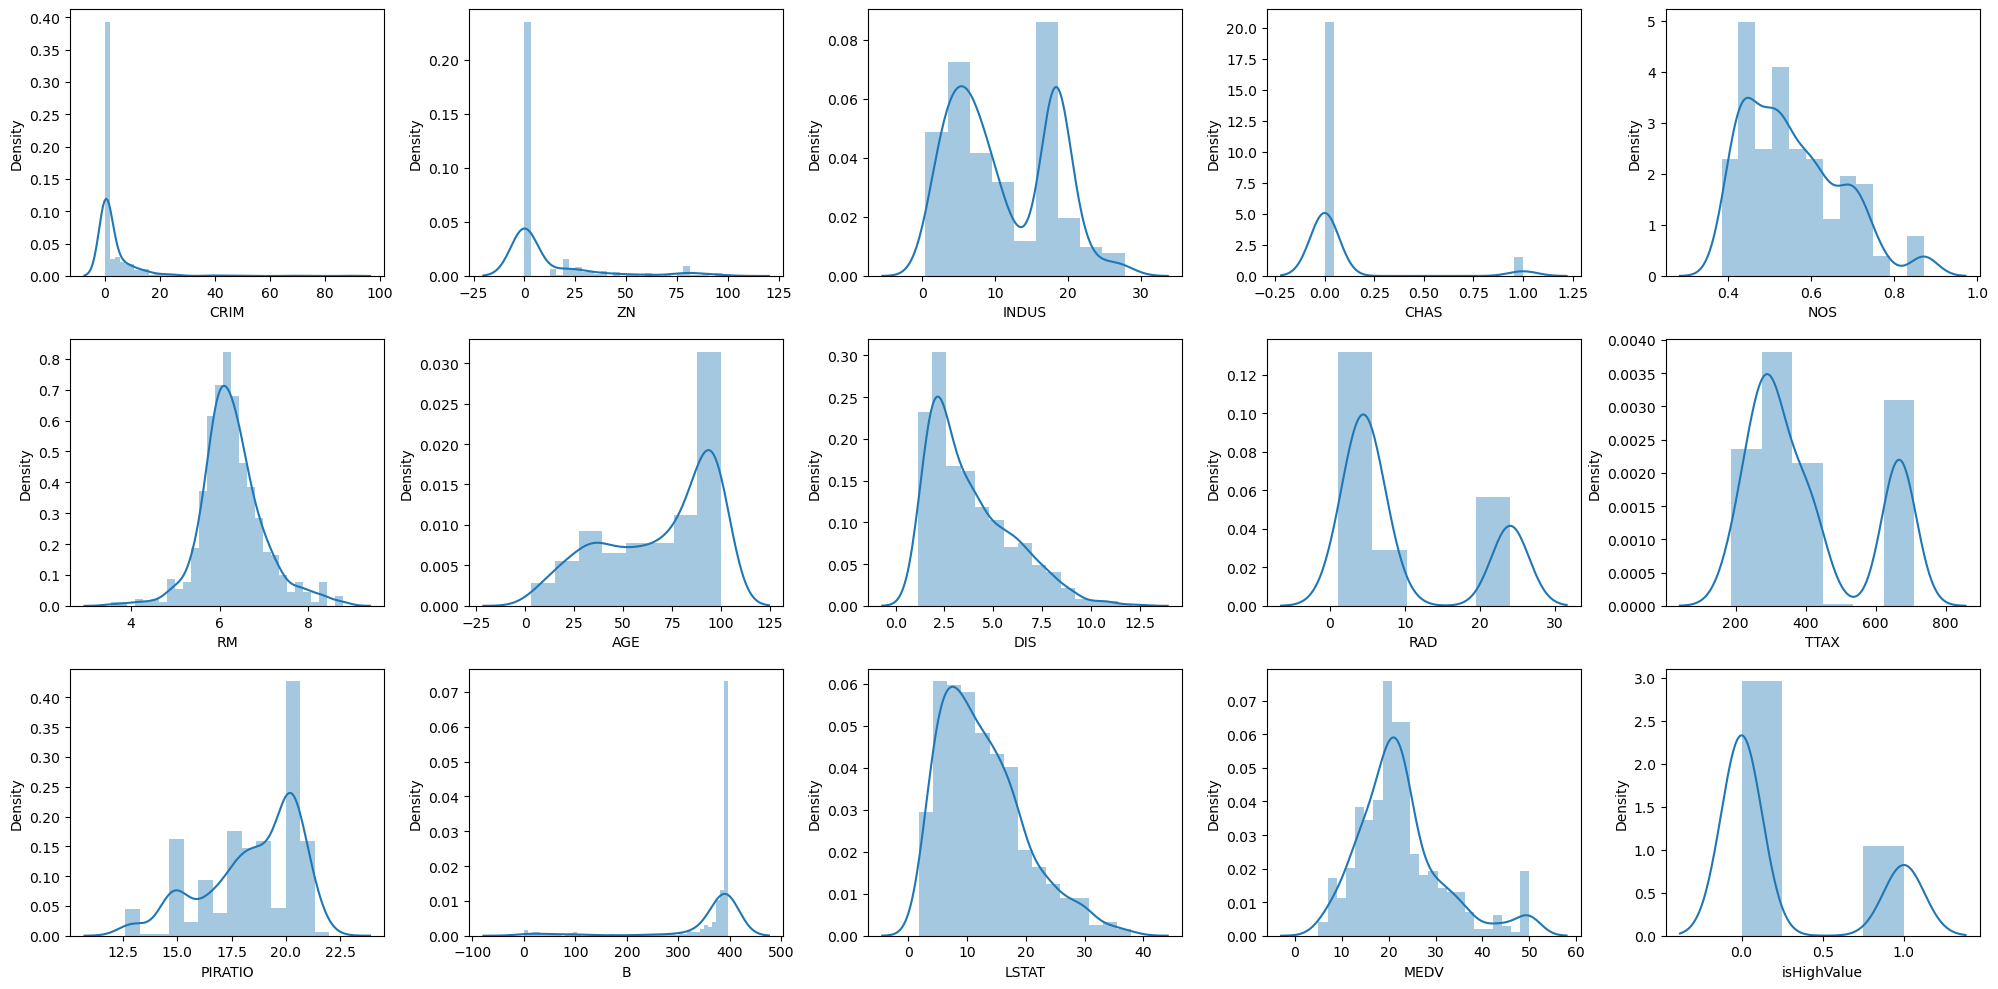

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = data.columns

fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20, 10))
idx = 0
for _row in range(3):
  for _col in range(5):
    if idx < len(cols):
      sns.distplot(data[cols[idx]], ax=axs[_row][_col])
      idx +=1

plt.tight_layout()


In [73]:
#변수의 왜도 확인
data.apply(lambda x : x.skew(), axis=0)

CRIM           5.223149
ZN             2.225666
INDUS          0.295022
CHAS           3.405904
NOS            0.729308
RM             0.403612
AGE           -0.598963
DIS            1.011781
RAD            1.004815
TTAX           0.669956
PIRATIO       -0.802325
B             -2.890374
LSTAT          0.906460
MEDV           1.108098
isHighValue    1.092403
dtype: float64

In [74]:
import numpy as np

data['CRIM'] = np.log1p(data['CRIM'])
data['CRIM'].skew()

/var/folders/cb/0cgtts7x7ps8zly4sl8xwntc0000gn/T/ipykernel_8883/3762648523.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CRIM'] = np.log1p(data['CRIM'])


1.2692005882725572

# 3.회귀모델링

## (1)데이터 탐색

In [75]:
df_r = data.drop(['isHighValue'], axis=1)

In [78]:
df_r

,CRIM,ZN,INDUS,CHAS,NOS,RM,AGE,DIS,RAD,TTAX,PIRATIO,B,LSTAT,MEDV
0,0.006300,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.026944,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.026924,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.031857,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.066770,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.060747,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.044275,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.058986,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.103991,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [79]:
cols = ['MEDV','LSTAT','RM','CHAS','RAD','TTAX']
print(df_r[cols].corr())

           MEDV     LSTAT        RM      CHAS       RAD      TTAX
MEDV   1.000000 -0.737663  0.695360  0.175260 -0.381626 -0.468536
LSTAT -0.737663  1.000000 -0.613808 -0.053929  0.488676  0.543993
RM     0.695360 -0.613808  1.000000  0.091251 -0.209847 -0.292048
CHAS   0.175260 -0.053929  0.091251  1.000000 -0.007368 -0.035587
RAD   -0.381626  0.488676 -0.209847 -0.007368  1.000000  0.910228
TTAX  -0.468536  0.543993 -0.292048 -0.035587  0.910228  1.000000


## (2)분석모형구축


In [88]:
from sklearn.model_selection import train_test_split

#데이터 분할
X_cols = ['LSTAT','RM','CHAS','RAD','TTAX','AGE','NOS','INDUS','CRIM']

X = df_r[X_cols].values
y = df_r['MEDV'].values

X_train_r,X_test_r, Y_train_r, Y_test_r = train_test_split(X,y, test_size=0.3,  random_state= 123)

In [91]:
#데이터 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_r_scaled = scaler.fit_transform(X_train_r)
X_test_r_scaled = scaler.fit_transform(X_test_r)

In [99]:
#모델구축
#선형회구

from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train_r_scaled, Y_train_r)

LinearRegression()

In [100]:
#계수 확인 => 클수록 영향도가 크다
print(model_lr.coef_)
print(model_lr.intercept_)

[-19.44355595  30.50168805   1.03615047   2.01058744  -7.50168363
   0.44156736   1.74222293   1.87859608   0.33601942]
13.145047988780767


In [101]:
#SVM
from sklearn.svm import SVR

model_svr = SVR()
model_svr.fit(X_train_r_scaled, Y_train_r)

SVR()

In [102]:
#랜덤포레스트
from sklearn.ensemble import RandomForestRegressor

model_rfr = RandomForestRegressor(random_state=123)
model_rfr.fit(X_train_r_scaled, Y_train_r)

RandomForestRegressor(random_state=123)

In [103]:
for x, val in zip(X_cols, model_rfr.feature_importances_):
    print(x, val)

LSTAT 0.34159569235888754
RM 0.5126505002265122
CHAS 0.0008061973637061849
RAD 0.006843928122008096
TTAX 0.021038457006925797
AGE 0.03694144500619505
NOS 0.028915490617661826
INDUS 0.010343041548522258
CRIM 0.040865247749581134


## (3)분석모형의 평가 

In [104]:
y_pred_lr = model_lr.predict(X_test_r_scaled)
y_pred_svr = model_svr.predict(X_test_r_scaled)
y_pred_rfr = model_rfr.predict(X_test_r_scaled)

In [109]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print('-'*30)
print('선형 회귀 결과')
print('MAE: %.3f' %mean_absolute_error(Y_test_r, y_pred_lr))
print('MSE: %.3f' %mean_squared_error(Y_test_r, y_pred_lr))
print('MAPE: %.3f' %mean_absolute_percentage_error(Y_test_r, y_pred_lr))
print('-'*30)
print('SVM 결과')
print('MAE: %.3f' %mean_absolute_error(Y_test_r, y_pred_svr))
print('MSE: %.3f' %mean_squared_error(Y_test_r, y_pred_svr))
print('MAPE: %.3f' %mean_absolute_percentage_error(Y_test_r, y_pred_svr))
print('-'*30)
print('랜덤 포레스트 결과')
print('MAE: %.3f' %mean_absolute_error(Y_test_r, y_pred_rfr))
print('MSE: %.3f' %mean_squared_error(Y_test_r, y_pred_rfr))
print('MAPE: %.3f' %mean_absolute_percentage_error(Y_test_r, y_pred_rfr))
print('-'*30)

------------------------------
선형 회귀 결과
MAE: 4.294
MSE: 39.061
MAPE: 0.224
------------------------------
SVM 결과
MAE: 3.681
MSE: 39.215
MAPE: 0.156
------------------------------
랜덤 포레스트 결과
MAE: 2.762
MSE: 21.109
MAPE: 0.137
------------------------------


# 4.분류모델링

In [111]:
df_c = data.drop(['MEDV'], axis =1)

<Axes: xlabel='isHighValue', ylabel='LSTAT'>

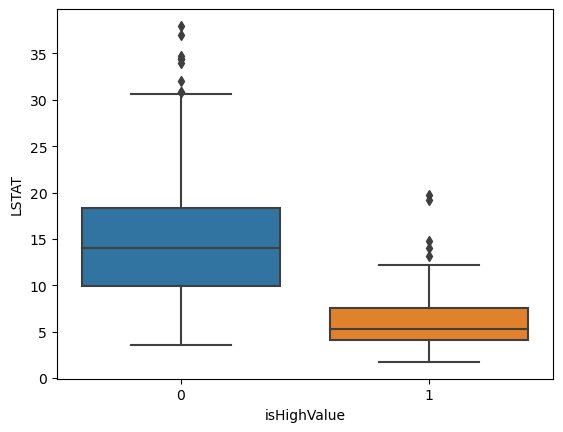

In [112]:
import seaborn as sns
sns.boxplot(x='isHighValue', y = 'LSTAT', data = df_c)

<Axes: xlabel='LSTAT', ylabel='Density'>

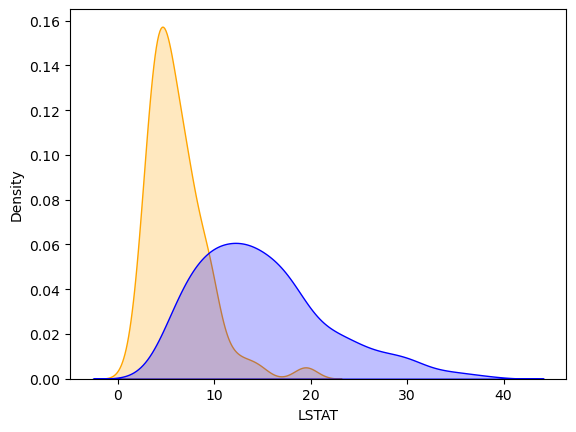

In [113]:
import seaborn as sns

sns.kdeplot(df_c.loc[df_c['isHighValue']==1, 'LSTAT'],color='orange', fill =True)
sns.kdeplot(df_c.loc[df_c['isHighValue']==0, 'LSTAT'],color= 'blue', fill=True)

In [114]:
import numpy as np 


df_c.groupby('isHighValue').apply(np.mean).T

/Users/keonhak/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/keonhak/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


isHighValue,0,1
CRIM,0.975497,0.354194
ZN,6.691176,24.602273
INDUS,12.777353,6.488485
CHAS,0.050802,0.121212
NOS,0.575957,0.494454
RM,6.028837,7.009394
AGE,73.275134,55.257576
DIS,3.593655,4.365642
RAD,10.729947,6.204545
TTAX,440.788770,316.007576


# (2)분석모형구축

In [125]:
#데이터분할
from sklearn.model_selection import train_test_split

X_cols = ['LSTAT','PIRATIO','TTAX','AGE','NOS','INDUS','CRIM']

X = data[X_cols].values
y = data['isHighValue'].values

X_train_c, X_test_c, y_train_C, y_test_c = train_test_split(X, y, test_size=0.3, random_state=123)

In [126]:
#데이터 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_c_scaled = scaler.fit_transform(X_train_c)
X_test_c_scaled = scaler.fit_transform(X_test_c)

In [131]:
#로지스틱회귀
from sklearn.linear_model import LogisticRegression

model_lo = LogisticRegression()
model_lo.fit(X_train_c_scaled,y_train_C)

LogisticRegression()

In [133]:
print(model_lo.coef_)
print(model_lo.intercept_)

[[-4.67917856 -2.26271976 -0.80852617  0.45926521 -0.32914015 -1.36930599
   0.86834454]]
[1.90334599]


In [140]:
#svc
from sklearn.svm import SVC

model_svc = SVC(probability=True)
model_svc.fit(X_train_c_scaled, y_train_C)

SVC(probability=True)

In [134]:
#랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier()
model_rfc.fit(X_train_c_scaled, y_train_C)

RandomForestClassifier()

In [135]:
model_rfc.feature_importances_

array([0.41122924, 0.09571167, 0.0959885 , 0.08712313, 0.07529245,
       0.13030628, 0.10434873])

# (3)분석모형평가

In [142]:
y_pred_lo = model_lo.predict(X_test_c_scaled)
y_pred_svc = model_svc.predict(X_test_c_scaled)
y_pred_rfc = model_rfc.predict(X_test_c_scaled)

from sklearn.metrics import classification_report

print('-'*60)
print('로지스틱 회귀 결과')
print(classification_report(y_test_c, y_pred_lo, labels=[0,1]))
print('-'*60)
print('SVM 결과')
print(classification_report(y_test_c, y_pred_svc, labels=[0,1]))
print('-'*60)
print('랜덤포레스트 결과')
print(classification_report(y_test_c, y_pred_rfc, labels=[0,1]))
print('-'*60)

------------------------------------------------------------
로지스틱 회귀 결과
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       115
           1       0.88      0.57      0.69        37

    accuracy                           0.88       152
   macro avg       0.88      0.77      0.81       152
weighted avg       0.88      0.88      0.87       152

------------------------------------------------------------
SVM 결과
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       115
           1       0.84      0.70      0.76        37

    accuracy                           0.89       152
   macro avg       0.87      0.83      0.85       152
weighted avg       0.89      0.89      0.89       152

------------------------------------------------------------
랜덤포레스트 결과
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       115
           1       0.82   

In [149]:
from sklearn.metrics import roc_auc_score

y_pred_lo = model_lo.predict_proba(X_test_c_scaled)[:, 1]
y_pred_svc = model_svc.predict_proba(X_test_c_scaled)[:, 1]
y_pred_rfc = model_rfc.predict_proba(X_test_c_scaled)[:, 1]

print('로지스틱 회귀 결과: %.3f' %roc_auc_score(y_test_c, y_pred_lo))
print('SVM 결과: %.3f' %roc_auc_score(y_test_c, y_pred_svc))
print('랜덤포레스트 결과: %.3f' %roc_auc_score(y_test_c, y_pred_rfc))

로지스틱 회귀 결과: 0.914
SVM 결과: 0.936
랜덤포레스트 결과: 0.962
